In [ ]:
!wget www.ivan-sipiran.com/downloads/Imagenes.zip
!unzip Imagenes.zip

# Extracción de Características y Matching de Imagenes

El cálculo de la diferencia de Gaussianos y la convolución permite la creación de algoritmos más avanzados para visión computacional. Ahora veremos cómo se extraen características locales en imágenes y como podemos encontrar objetos en una imagen.

[[[220 229 216]
  [195 205 193]
  [214 228 222]
  ...
  [228 204 184]
  [228 204 184]
  [227 203 183]]

 [[201 213 201]
  [192 206 195]
  [210 226 219]
  ...
  [228 204 184]
  [228 204 184]
  [227 203 183]]

 [[148 165 154]
  [151 170 161]
  [169 189 184]
  ...
  [228 204 184]
  [228 204 184]
  [227 203 183]]

 ...

 [[ 97 109 119]
  [ 98 110 120]
  [ 99 111 121]
  ...
  [224 232 232]
  [228 235 238]
  [226 234 234]]

 [[ 97 109 119]
  [ 98 110 120]
  [ 99 111 121]
  ...
  [143 148 151]
  [141 145 150]
  [143 148 151]]

 [[ 97 109 119]
  [ 98 110 120]
  [ 99 111 121]
  ...
  [146 150 155]
  [149 153 158]
  [143 147 152]]]


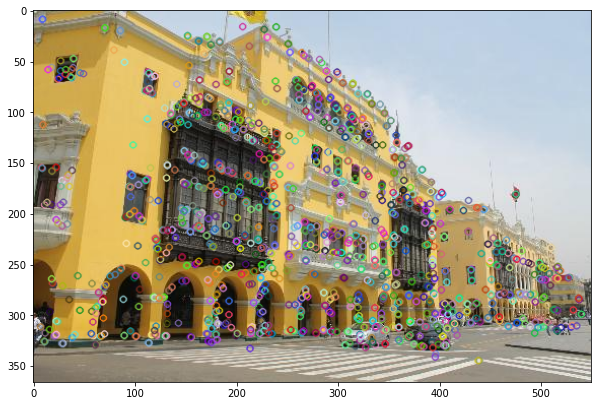

In [3]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('Imagenes/centro1.jpg')

img1 = img1[:,:,::-1]

imgPlot = img1.copy()

#variante de SIFT: KAZE
#KAZE es el reemplazo open source de SIFT
#SIFT es un algoritmo patentado
kaze = cv2.KAZE_create()
kps = kaze.detect(imgPlot)
cv2.drawKeypoints(imgPlot, kps, imgPlot)
plt.figure(figsize=(10,10))
plt.imshow(imgPlot)
plt.show()

Los puntos de interés se computan usando las diferencias de Gaussianos en escalas pequeñas. Se podría decir que son puntos con características distintivas y que permiten encontrar correspondencias. Veamos ahora como se encuentran puntos correspondientes de dos imágenes en diferentes puntos de vista

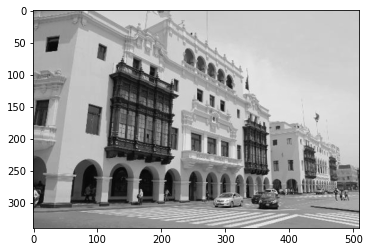

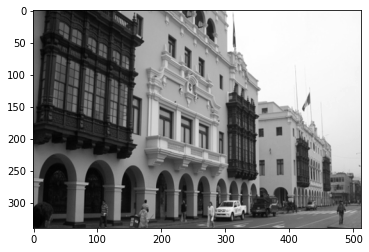

# kps: 1115, descriptors: (1115, 64)


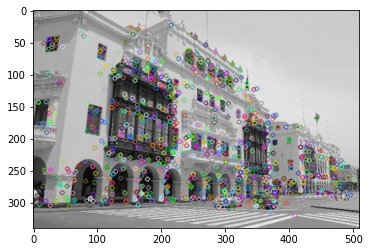

# kps: 1119, descriptors: (1119, 64)


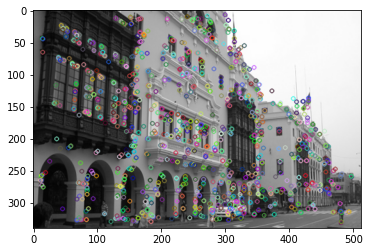

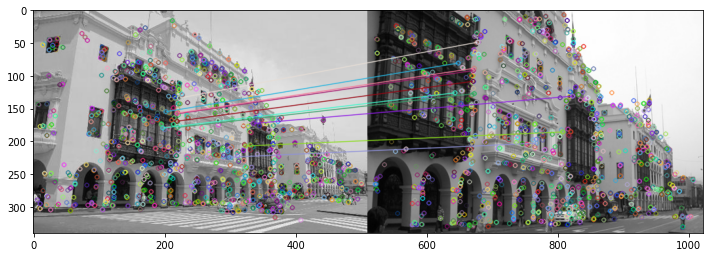

[[ 5.49356211e-01  1.32925628e-02  1.12680005e+02]
 [-1.39150188e-01  5.45181710e-01  1.19040179e+02]
 [-4.81878622e-04  2.28088672e-05  1.00000000e+00]]


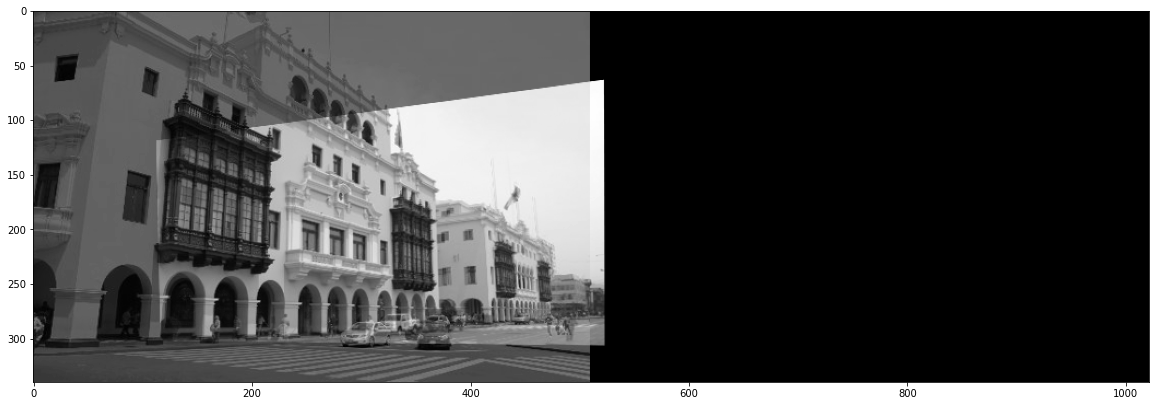

In [ ]:
import numpy as np

img1    = cv2.imread('Imagenes/lima1.png',0)
fig1    = plt.imshow(img1, cmap='gray')
plt.show()

img2    = cv2.imread('Imagenes/lima2.png',0)
fig2    = plt.imshow(img2, cmap='gray')
plt.show()

#Computando Características :: kp1=> lista de keypoints y desc => descriptor
kaze1      = cv2.KAZE_create()

#descriptores: kp1 y desc1
kp1, desc1 = kaze1.detectAndCompute(img1,None)
print("# kps: {}, descriptors: {}".format(len(kp1), desc1.shape))
img4 = cv2.drawKeypoints(img1,kp1,img1)
fig4 = plt.imshow(img4, cmap='gray')
plt.show()
cv2.imwrite('kaze_keypoints.jpg',img4)

#descriptores: kp2 y desc2
kp2, desc2 = kaze1.detectAndCompute(img2,None)
print("# kps: {}, descriptors: {}".format(len(kp2), desc2.shape))
img5 = cv2.drawKeypoints(img2,kp2,img2)
fig5 = plt.imshow(img5, cmap='gray')
plt.show()
cv2.imwrite('kaze_keypoints2.jpg',img5)

#Matching Keypoints usando BLT:
# create BFMatcher object
# aquí se ejecuta el match de los keypoints
# NORM_L2: distancia euclideana | NORM_L1: distancia con valores absolutos
# Las distancias nos ayudan a ver qué tan parecidos son los keypoints
# El parámetro 'crossCheck': True hace un doble check: de la 2da imagen a la 1era y viceversa
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors usando los descriptores de imagen 1 e imagen 2
# Operación de match
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
# ordenemos de menor a mayor distancia
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
# seleccioanmos solo los 10 matches con menor distancia
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img1)


plt.figure(figsize=(12,12))
plt.imshow(img3),plt.show()

#combinación de ambas imágenes
points1 = np.zeros((len(matches),2), dtype = np.float32)
points2 = np.zeros((len(matches),2), dtype = np.float32)

for i , match in enumerate(matches):
    points1[i,:] = kp1[match.queryIdx].pt
    points2[i,:] = kp2[match.trainIdx].pt

#Find homography
# RANSAC: detectar puntos o cuatro esquinas para hacer el 'joint'
# 'h': matriz de transformación
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print(h)

# hacemos el joint con la imagen 2 como base de inserción y le damos las dimensiones '(...)'
imgRes = cv2.warpPerspective(img2, h, (img1.shape[1] + img2.shape[1], img2.shape[0]))


#Realizamos el image blending
#Blending es el proceso mendiante el cual efectuamos el joint
#sacando una imagen (imagen 1) e insertándolo en otra (imagen 2)
#para ello, enfatizamos la iluminación blanca (*0.5) de la imagen que ha ingresado
imgRes[0:img1.shape[0],0:img1.shape[1]] = 0.5*imgRes[0:img1.shape[0],0:img1.shape[1]] + 0.5*img1

plt.figure(figsize=(20,20))
plt.imshow(imgRes, cmap='gray')
plt.show()

Recordemos que esta proyección de la imagen1 en la 2 sirve para poder, por ejemplo, hacer detección de objetos en una imagen.

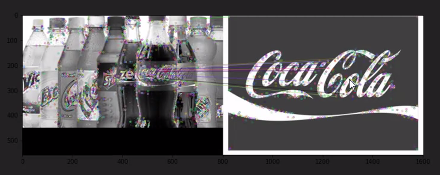

### Práctica de lo anterior


#TAREA 1: poder hacer un función resumen de este proceso (PAQUETE)

Agregar que solo retorne la imagen seleccionada.

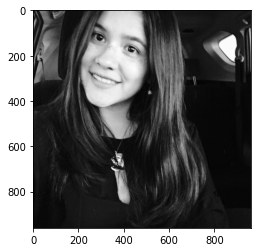

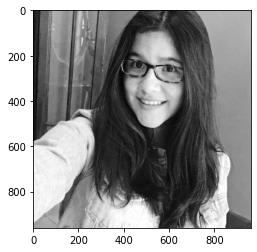

# kps: 1005, descriptors: (1005, 64)


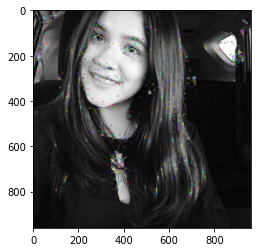

# kps: 1296, descriptors: (1296, 64)


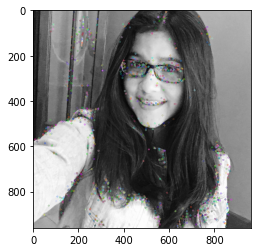

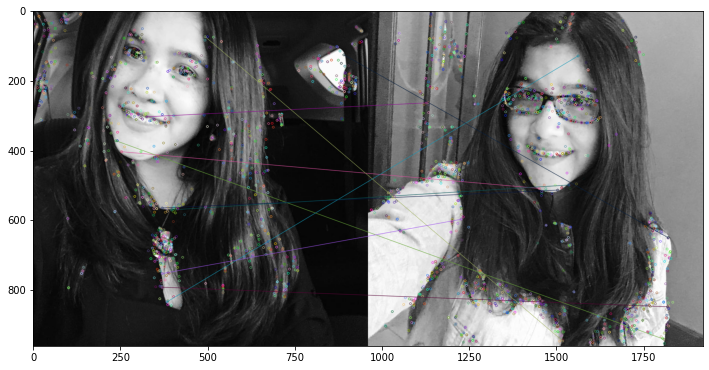

[[-1.69293226e+00 -1.08020929e+00  8.71786447e+02]
 [-5.32005957e-01 -2.48312362e+00  8.51075549e+02]
 [-5.91420677e-04 -5.23617645e-03  1.00000000e+00]]


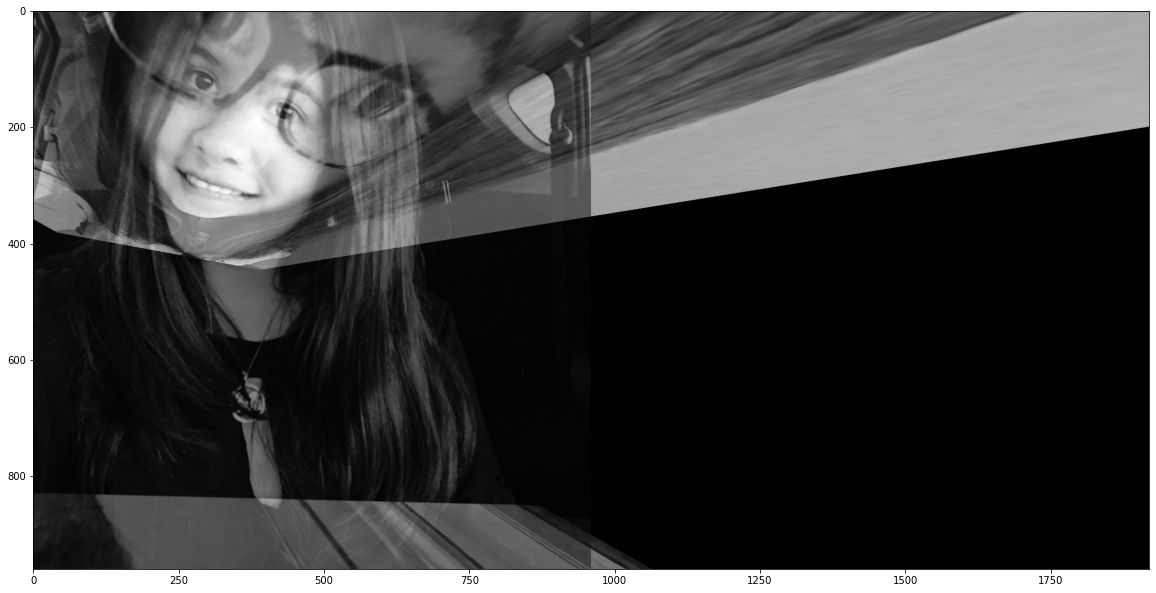

In [ ]:
#cambiamos imágenes de gaseosas
#img1 = cv2.imread('gaseosas-3.jpg',0)
img1 = cv2.imread('norma2.jpg',0)
fig1 = plt.imshow(img1, cmap='gray')
plt.show()

#cambiamos logo de la gaseosa a ubicar
#img2    = cv2.imread('logococacola.jpg',0)
img2   = cv2.imread('norma1.jpg',0)
fig2   = plt.imshow(img2, cmap='gray')
plt.show()


#Computando Características :: kp1=> lista de keypoints y desc => descriptor
kaze1      = cv2.KAZE_create()

#descriptores: kp1 y desc1
kp1, desc1 = kaze1.detectAndCompute(img1,None)
print("# kps: {}, descriptors: {}".format(len(kp1), desc1.shape))
img4 = cv2.drawKeypoints(img1,kp1,img1)
fig4 = plt.imshow(img4, cmap='gray')
plt.show()
cv2.imwrite('kaze_keypoints.jpg',img4)

#descriptores: kp2 y desc2
kp2, desc2 = kaze1.detectAndCompute(img2,None)
print("# kps: {}, descriptors: {}".format(len(kp2), desc2.shape))
img5 = cv2.drawKeypoints(img2,kp2,img2)
fig5 = plt.imshow(img5, cmap='gray')
plt.show()
cv2.imwrite('kaze_keypoints2.jpg',img5)

#Matching Keypoints usando BLT:
# create BFMatcher object
# aquí se ejecuta el match de los keypoints
# NORM_L2: distancia euclideana | NORM_L1: distancia con valores absolutos
# Las distancias nos ayudan a ver qué tan parecidos son los keypoints
# El parámetro 'crossCheck': True hace un doble check: de la 2da imagen a la 1era y viceversa
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

# Match descriptors usando los descriptores de imagen 1 e imagen 2
# Operación de match
matches = bf.match(desc1,desc2)

# Sort them in the order of their distance.
# ordenemos de menor a mayor distancia
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
# seleccioanmos solo los 10 matches con menor distancia
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10], img1)


plt.figure(figsize=(12,12))
plt.imshow(img3),plt.show()

#combinación de ambas imágenes
points1 = np.zeros((len(matches),2), dtype = np.float32)
points2 = np.zeros((len(matches),2), dtype = np.float32)

for i , match in enumerate(matches):
    points1[i,:] = kp1[match.queryIdx].pt
    points2[i,:] = kp2[match.trainIdx].pt

#Find homography
# RANSAC: detectar puntos o cuatro esquinas para hacer el 'joint'
# 'h': matriz de transformación
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)
print(h)

# hacemos el joint con la imagen 2 como base de inserción y le damos las dimensiones '(...)'
imgRes = cv2.warpPerspective(img2, h, (img1.shape[1] + img2.shape[1], img2.shape[0]))

#Realizamos el image blending
#Blending es el proceso mendiante el cual efectuamos el joint
#sacando una imagen (imagen 1) e insertándolo en otra (imagen 2)
#para ello, enfatizamos la iluminación blanca (*0.5) de la imagen que ha ingresado
imgRes[0:img1.shape[0],0:img1.shape[1]] = 0.5*imgRes[0:img1.shape[0],0:img1.shape[1]] + 0.5*img1

#NOTA: para que el efecto final de superposición pueda lograrse ('blending')
#es importante que las imágenes se encuentren en un tamaño equivalente
#de ese modo, no existe una distorsión al momento de superponer las imágenes

plt.figure(figsize=(20,20))
plt.imshow(imgRes, cmap='gray')
plt.show()

#TAREA 2: completar este ejercicio

**EJERCICIO**

Usar características locales para componer la imagen panorámica a partir de las imagenes tomadas en la secuencia que sigue:

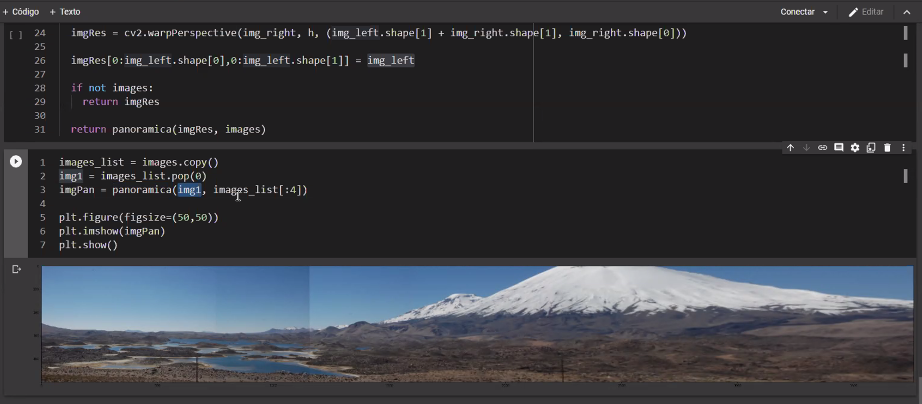

Steps:

1. Compute the sift-key points and descriptors for left and right images.
2. Compute distances between every descriptor in one image and every descriptor in the other image.
3. Select the top best matches for each descriptor of an image.
4. Run RANSAC to estimate homography.
5. Warp to align for stitching.
6. Finally stitch them together.

Source: https://medium.com/analytics-vidhya/image-stitching-with-opencv-and-python-1ebd9e0a6d78 


In [ ]:
"""
Secuencia de imágenes donde debe existir un overlapping entre imágenes 
de modo que permítase conectarse.

'Stitching': combinar las imágenes para producir una única salida.
"""

"\nSecuencia de imágenes donde debe existir un overlapping entre imágenes \nde modo que permítase conectarse.\n\n'Stitching': combinar las imágenes para producir una única salida.\n"

In [ ]:
import glob 
from google.colab.patches import cv2_imshow
images = [cv2.imread(f) for f in sorted(glob.glob('Imagenes/DSC_41*.JPG'))] 
#en 'images' hay alrededor de 6 imágenes (o fracciones de ellas) 
#que deban reconstruirse

In [ ]:
#original images
#always start from right to left
img1_, img2_, img3_, img4_, img5_, img6_, img7_ = images 

In [ ]:
#gray scale color org. images
img1, img2, img3, img4, img5, img6, img7 = [
                                            cv2.cvtColor(
                                                image,cv2.COLOR_BGR2GRAY
                                                ) for image in images
                                            ]

In [ ]:
sift = cv2.KAZE_create()
#find kepoints
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

In [ ]:
match = cv2.BFMatcher()
matches = match.knnMatch(des1,des2,k=2)

In [ ]:
matches

In [ ]:
good = []
for m,n in matches:
  print("m",m.distance)
  print("n",n.distance)
  if m.distance > 0.03*n.distance:
    print("Append")
    good.append(m)

In [ ]:
draw_params = dict(matchColor=(0,255,0),
                       singlePointColor=None,
                       flags=2)

In [ ]:
#result image
img_3 = cv2.drawMatches(img1_,kp1,img2_,kp2,good,None,**draw_params)

In [ ]:
MIN_MATCH_COUNT = 10
if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts, M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print("Not enought matches are found - %d/%d", (len(good)/MIN_MATCH_COUNT))

In [ ]:
dst = cv2.warpPerspective(img1_,M,(img2_.shape[1] + img1_.shape[1], img2_.shape[0]))
dst[0:img1_.shape[0],0:img1_.shape[1]] = img2_
#cv2_imshow(dst)

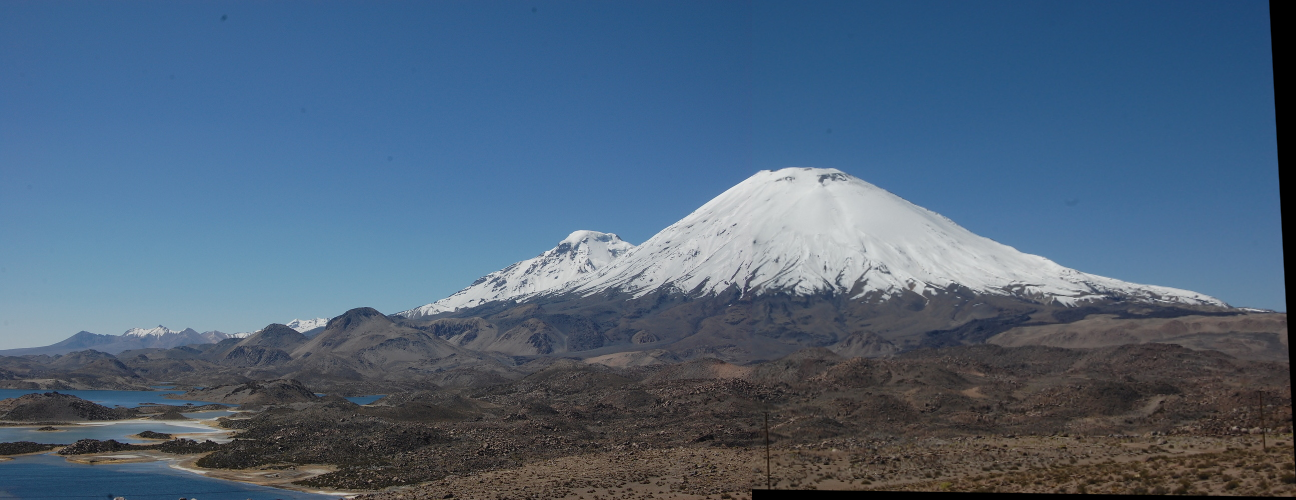

In [ ]:
def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop top
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop top
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop top
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame
    
cv2_imshow(trim(dst))